In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
dataset = pd.read_excel("Dataset_Final.xlsx",index_col=0)

In [4]:
dataset

,Link,Speech,Hate Speech
Serial No.,,,
1,https://www.youtube.com/watch?v=7HK_0WGcC-E,"Hindu's Hindustan, Mullah Pakistan's home, Lor...",1
2,https://www.youtube.com/watch?v=ZyIwvIX99P4&t=52s,Of those people?\n \nThese clothes are torn a...,1
3,https://www.youtube.com/shorts/qca7SjFOwJQ,This has been one of the most study relationsh...,0
4,https://youtu.be/loXClqiFmT0,above the Supreme Court. Give our court\nWe ha...,1
5,https://www.youtube.com/watch?v=RU2EVEuXipc,"If you want to change this future, then become...",1
...,...,...,...
96,https://www.youtube.com/watch?v=TaF0t-94GKM,India is going from a 3.5 trillion economy to ...,0
97,https://www.youtube.com/watch?v=sNYRbb9Y8o0,"\nThe growth rate for India, which is 6.8 in 2...",0
98,https://www.youtube.com/watch?v=j_T6zLsXCPc,\nYou all saw just now an example of a bridge ...,0


In [5]:
dataset = dataset.replace('\n','',regex=True)

In [6]:
dataset

,Link,Speech,Hate Speech
Serial No.,,,
1,https://www.youtube.com/watch?v=7HK_0WGcC-E,"Hindu's Hindustan, Mullah Pakistan's home, Lor...",1
2,https://www.youtube.com/watch?v=ZyIwvIX99P4&t=52s,Of those people? These clothes are torn and t...,1
3,https://www.youtube.com/shorts/qca7SjFOwJQ,This has been one of the most study relationsh...,0
4,https://youtu.be/loXClqiFmT0,above the Supreme Court. Give our courtWe have...,1
5,https://www.youtube.com/watch?v=RU2EVEuXipc,"If you want to change this future, then become...",1
...,...,...,...
96,https://www.youtube.com/watch?v=TaF0t-94GKM,India is going from a 3.5 trillion economy to ...,0
97,https://www.youtube.com/watch?v=sNYRbb9Y8o0,"The growth rate for India, which is 6.8 in 202...",0
98,https://www.youtube.com/watch?v=j_T6zLsXCPc,You all saw just now an example of a bridge th...,0


In [7]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import *
import string
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")
nltk.download("omw-1.4")
nltk.download("stopwords")
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
import seaborn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

[nltk_data] Downloading package wordnet to /home/ec2-user/nltk_data...
[nltk_data] Downloading package omw-1.4 to /home/ec2-user/nltk_data...
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
speech_data = dataset['Speech']
speech_data

Serial No.
1      Hindu's Hindustan, Mullah Pakistan's home, Lor...
2       Of those people? These clothes are torn and t...
3      This has been one of the most study relationsh...
4      above the Supreme Court. Give our courtWe have...
5      If you want to change this future, then become...
                             ...                        
96     India is going from a 3.5 trillion economy to ...
97     The growth rate for India, which is 6.8 in 202...
98     You all saw just now an example of a bridge th...
99     We are admired high level of in some scientifi...
100    Commerce and Industry Minister Piyush Goyal sa...
Name: Speech, Length: 100, dtype: object

#  Pre Processing of text

In [9]:
## 1. Removal of punctuation and capitlization
## 2. Tokenizing
## 3. Removal of stopwords
## 4. Stemming

stopwords = nltk.corpus.stopwords.words("english")
wnl = WordNetLemmatizer()

def preprocess(speech_data):  
    
    # removal of extra spaces
    regex_pat = re.compile(r'\s+')
    speech_space = speech_data.str.replace(regex_pat, ' ')
    
    # removal of punctuations and numbers
    punc_remove = speech_space.str.replace("[^a-zA-Z]", " ")
    # remove whitespace with a single space
    newspeech=punc_remove.str.replace(r'\s+', ' ')
    # remove leading and trailing whitespace
    newspeech=newspeech.str.replace(r'^\s+|\s+?$','')
    # removal of capitalization
    speech_lower = newspeech.str.lower()
    speech_lower = speech_lower.fillna("")
    
    # tokenizing
    tokenized_speech = speech_lower.apply(lambda x: x.split())
    
    # removal of stopwords
    tokenized_speech=  tokenized_speech.apply(lambda x: [item for item in x if item not in stopwords])
    
    # lematization  of the tweets
    tokenized_speech = tokenized_speech.apply(lambda x: [wnl.lemmatize(i, pos="v") for i in x]) 

    tokenized_speech = np.array(tokenized_speech)
    for i in range(len(tokenized_speech)):
        tokenized_speech[i] = ' '.join(tokenized_speech[i])
        processed_speech= tokenized_speech
    
    
    return processed_speech
    

processed_speech = preprocess(speech_data)   

processed_speech


array(['hindu hindustan mullah pakistan home lord ramraj come country become hindu nation neither become country hindus cheat countries measure hindu nation definitely kind inspiration song brother class people improve otherwise whatever want happen yet main stream kind music fast matter time become like know one major would learn say vande mataram learn say vande mataram learn stay within limit top call blood vans earlier song best kesar ton idea unity music best always try one community anit become genocide units call genocide kinds approach hindi song government land encroach upon mcd land document make recovery people foreigners enter infiltration bangladeshis rohingyas muslims today dispute increase nothing dispute muslims nadaf par become part kind crowd part kind sense become part common consciousness lie participation kind bite song z many time become kinds like things afraid things go dangerous level',
       'people clothe tear hurt look hurt hit fists behavior increase sloga

In [11]:
dataset['processed_speech'] = processed_speech
dataset

,Link,Speech,Hate Speech,processed_speech
Serial No.,,,,
1,https://www.youtube.com/watch?v=7HK_0WGcC-E,"Hindu's Hindustan, Mullah Pakistan's home, Lor...",1,hindu hindustan mullah pakistan home lord ramr...
2,https://www.youtube.com/watch?v=ZyIwvIX99P4&t=52s,Of those people? These clothes are torn and t...,1,people clothe tear hurt look hurt hit fists be...
3,https://www.youtube.com/shorts/qca7SjFOwJQ,This has been one of the most study relationsh...,0,one study relationships international relation...
4,https://youtu.be/loXClqiFmT0,above the Supreme Court. Give our courtWe have...,1,supreme court give courtwe wake front penniles...
5,https://www.youtube.com/watch?v=RU2EVEuXipc,"If you want to change this future, then become...",1,want change future become maruti margbhandu ma...
...,...,...,...,...
96,https://www.youtube.com/watch?v=TaF0t-94GKM,India is going from a 3.5 trillion economy to ...,0,india go trillion economy trillion economy yea...
97,https://www.youtube.com/watch?v=sNYRbb9Y8o0,"The growth rate for India, which is 6.8 in 202...",0,growth rate india let forget one bright spot g...
98,https://www.youtube.com/watch?v=j_T6zLsXCPc,You all saw just now an example of a bridge th...,0,saw example bridge build indian support indian...


In [12]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 14.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


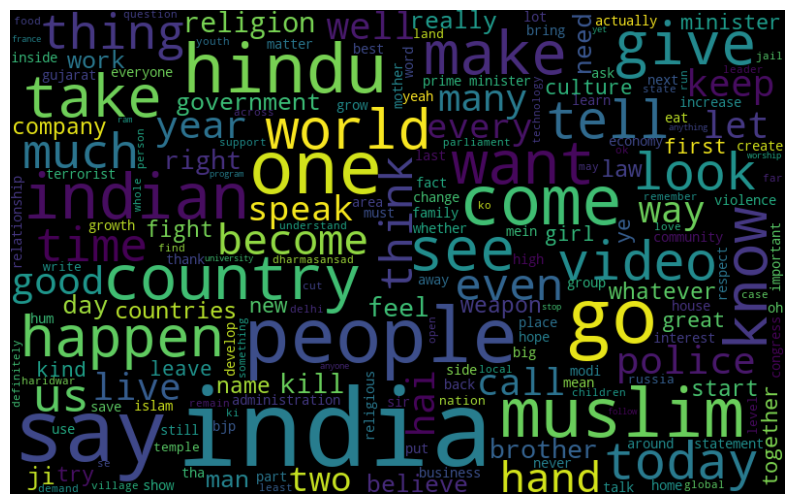

In [13]:
# visualizing which of the word is most commonly used in the twitter dataset
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
# imshow-Display data as an image
# interpolation - https://matplotlib.org/3.2.1/gallery/images_contours_and_fields/interpolation_methods.html
all_words = ' '.join([text for text in dataset['processed_speech'] ])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
#random=0.30
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


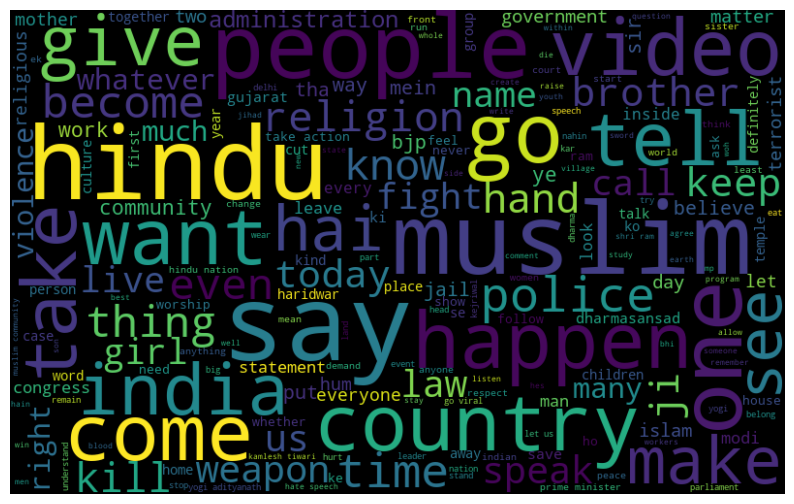

In [14]:
all_words = ' '.join([text for text in dataset['processed_speech'][dataset['Hate Speech'] == 1.0] ])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
#random=0.30
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

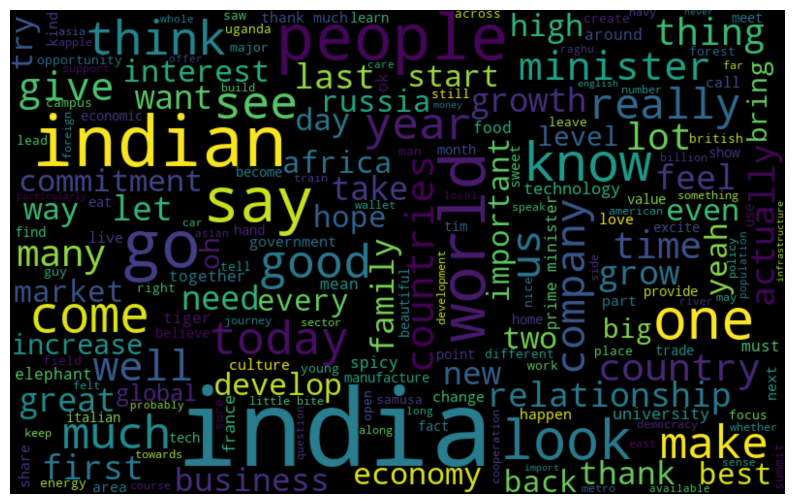

In [15]:
all_words = ' '.join([text for text in dataset['processed_speech'][dataset['Hate Speech'] == 0.0] ])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
#random=0.30
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="gaussian")
plt.axis('off')
plt.show()

# Feature Engineering

In [16]:
#TF-IDF Features-F1
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),max_df=0.75, min_df=5, max_features=100)

# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(dataset['processed_speech'] )
tfidf

<100x100 sparse matrix of type '<class 'numpy.float64'>'
	with 2033 stored elements in Compressed Sparse Row format>

In [17]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [18]:
import matplotlib.pyplot as plt

def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

In [19]:
# If you don't specify the random_state in the code, 
# then every time you run(execute) your code a new random value is generated 
# and the train and test datasets would have different values each time.
X = tfidf
y = dataset['Hate Speech'].astype(int)
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)
model = LogisticRegression().fit(X_train_tfidf,y_train)
y_preds = model.predict(X_test_tfidf)
report = classification_report( y_test, y_preds )
print(report)
acc=accuracy_score(y_test,y_preds)
print("Logistic Regression, Accuracy Score:" , acc)

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        11
           1       0.87      0.93      0.90        14

    accuracy                           0.88        25
   macro avg       0.88      0.87      0.88        25
weighted avg       0.88      0.88      0.88        25

Logistic Regression, Accuracy Score: 0.88


In [23]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score

confusion_matrix(y_test,y_preds)

array([[10,  1],
       [ 2, 12]])

In [24]:
precision_score(y_test,y_preds)

0.9230769230769231

In [25]:
recall_score(y_test,y_preds)

0.8571428571428571

In [26]:
f1_score(y_test,y_preds)

0.888888888888889

model 1 AUC score: 0.8733766233766233


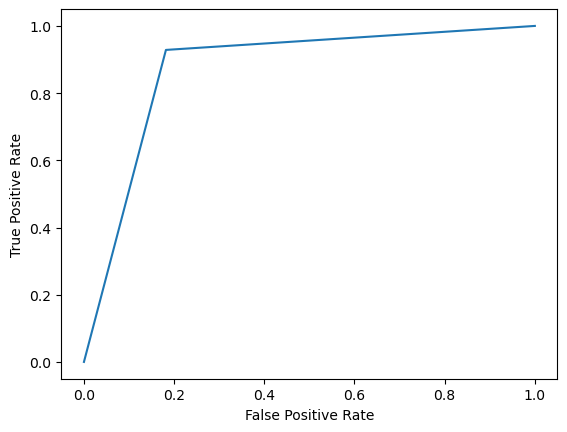

In [21]:
plot_roc_curve(y_test, y_preds)
print(f'model 1 AUC score: {roc_auc_score(y_test, y_preds)}')

In [34]:
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)
rf=RandomForestClassifier()
rf.fit(X_train_tfidf,y_train)
y_preds = rf.predict(X_test_tfidf)
acc1=accuracy_score(y_test,y_preds)
report = classification_report( y_test, y_preds )
print(report)
print("Random Forest, Accuracy Score:",acc1)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        11
           1       1.00      0.86      0.92        14

    accuracy                           0.92        25
   macro avg       0.92      0.93      0.92        25
weighted avg       0.93      0.92      0.92        25

Random Forest, Accuracy Score: 0.92


In [35]:
confusion_matrix(y_test,y_preds)

array([[11,  0],
       [ 2, 12]])

In [36]:
precision_score(y_test,y_preds)


1.0

In [37]:

recall_score(y_test,y_preds)


0.8571428571428571

In [38]:
f1_score(y_test,y_preds)

0.923076923076923

model 2 AUC score: 0.8831168831168831


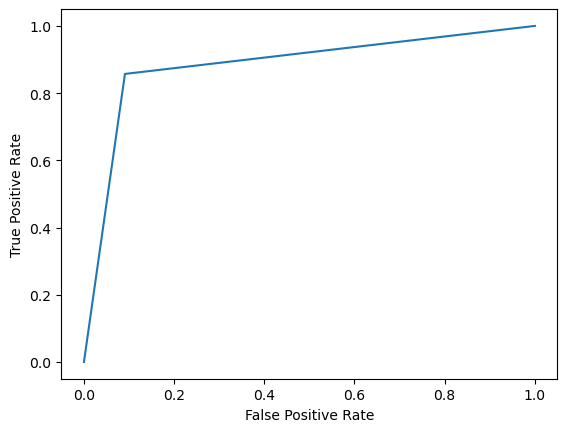

In [33]:
plot_roc_curve(y_test, y_preds)
print(f'model 2 AUC score: {roc_auc_score(y_test, y_preds)}')

In [41]:
pip install h2o 

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 MB 2.4 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.40.0.4-py2.py3-none-any.whl size=177697885 sha256=7f6cc2cb1febb67ad68d5e794ff8bbbe0d9d47459bf760e566c4d5f9d4796409
  Stored in directory: /home/ec2-user/.cache/pip/wheels/5d/cb/0e/dd8dc3921ae87b3657d7f1b83607100fd896107eef31d404c6
Successfully built h2o
Note: you may need to restart the kernel to use updated packages.


In [42]:
import h2o
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
from h2o.grid.grid_search import H2OGridSearch

In [43]:
pip install -f https://h2o-release.s3.amazonaws.com/h2o/lastest_statble_Py.html h2o

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
Looking in links: https://h2o-release.s3.amazonaws.com/h2o/lastest_statble_Py.html
Note: you may need to restart the kernel to use updated packages.


In [44]:
h2o.init()


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_362"; OpenJDK Runtime Environment (build 1.8.0_362-b08); OpenJDK 64-Bit Server VM (build 25.362-b08, mixed mode)
  Starting server from /home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpy74kkug3
  JVM stdout: /tmp/tmpy74kkug3/h2o_ec2_user_started_from_python.out
  JVM stderr: /tmp/tmpy74kkug3/h2o_ec2_user_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.4
H2O_cluster_version_age:,16 days
H2O_cluster_name:,H2O_from_python_ec2_user_tm069y
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,864 Mb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [45]:
dataset_h2o= pd.read_excel("Dataset_Final.xlsx",index_col=0)
dataset_h2o = dataset_h2o.replace('\n','',regex=True)


In [46]:
X_train,X_test = train_test_split(dataset_h2o,test_size=0.40,random_state=100)

In [47]:
X_train.count()

Link           60
Speech         60
Hate Speech    60
dtype: int64

In [48]:
## 1. Removal of punctuation and capitlization
## 2. Tokenizing
## 3. Removal of stopwords
## 4. Stemming
import nltk
nltk.download("punkt")
stop_words = nltk.corpus.stopwords.words("english")
wnl = WordNetLemmatizer()

def preprocessor(text):  
    tokens = [word for word in nltk.word_tokenize(text) if (len(word) > 3 and len(word.strip('Xx/')) > 2 and len(re.sub('\d+', '', word.strip('Xx/'))) > 3) ] 
    tokens = map(str.lower, tokens)
    stems = [wnl.lemmatize(item, pos="v") for item in tokens if (item not in stop_words)] 
    return stems

[nltk_data] Downloading package punkt to /home/ec2-user/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [49]:
vectorizer_tf = TfidfVectorizer(tokenizer=preprocessor, stop_words=None, max_df=0.75, max_features=100, lowercase=False, ngram_range=(1,2))

In [50]:
train_vectors = vectorizer_tf.fit_transform(X_train['Speech'].values.astype(str)) 
test_vectors = vectorizer_tf.transform(X_test['Speech'].values.astype(str))

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [51]:
train_df=pd.DataFrame(train_vectors.toarray(), columns=vectorizer_tf.get_feature_names_out())
test_df=pd.DataFrame(test_vectors.toarray(), columns=vectorizer_tf.get_feature_names_out())

In [52]:
train_df=pd.concat([train_df,X_train['Hate Speech'].reset_index(drop=True)], axis=1)
test_df=pd.concat([test_df,X_test['Hate Speech'].reset_index(drop=True)], axis=1)

In [53]:
h2o_train_df = h2o.H2OFrame(train_df)
h2o_test_df = h2o.H2OFrame(test_df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [54]:
h2o_train_df['Hate Speech'] = h2o_train_df['Hate Speech'].asfactor()
h2o_test_df['Hate Speech'] = h2o_test_df['Hate Speech'].asfactor()

In [55]:
x=vectorizer_tf.get_feature_names_out()
y='Hate Speech'

In [27]:
hyper_params1 = {'activation': ["Rectifier","RectifierWithDropout", "Maxout","MaxoutWithDropout"],
                'l1': [0, 0.00001, 0.0001],
                'l2':[0, 0.00001, 0.0001],
                'rate':[0, 0.1, 0.005, 0.001],
                'rho':[0.9, 0.95, 0.99, 0.999],
               'epochs':[1,3,5]
              }

In [28]:
search_criteria = {'strategy':'RandomDiscrete','max_models':100,'seed':42}

In [29]:
gbm_grid2 = H2OGridSearch(model=H2ODeepLearningEstimator,
                          grid_id='gbm_grid2',
                          hyper_params=hyper_params1,
                         search_criteria=search_criteria)
gbm_grid2.train(x=x, y=y,
                training_frame=h2o_train_df,
                validation_frame=h2o_test_df
                )

deeplearning Grid Build progress: |██████████████████████████████████████████████| (done) 100%


,activation,epochs,l1,l2,rate,rho,model_ids,logloss
,RectifierWithDropout,3.0,0.0,0.0001,0.005,0.99,gbm_grid2_model_23,0.2102225
,MaxoutWithDropout,3.0,1e-05,0.0001,0.0,0.99,gbm_grid2_model_59,0.2351447
,Maxout,3.0,1e-05,0.0,0.005,0.95,gbm_grid2_model_72,0.2831821
,RectifierWithDropout,3.0,1e-05,1e-05,0.001,0.99,gbm_grid2_model_85,0.3020446
,Rectifier,3.0,1e-05,0.0001,0.001,0.9,gbm_grid2_model_9,0.3303275
,RectifierWithDropout,3.0,1e-05,1e-05,0.005,0.99,gbm_grid2_model_10,0.3793050
,RectifierWithDropout,3.0,0.0,0.0001,0.005,0.95,gbm_grid2_model_100,0.3824971
,Rectifier,5.0,0.0001,1e-05,0.005,0.95,gbm_grid2_model_56,0.3914622
,RectifierWithDropout,3.0,1e-05,0.0001,0.1,0.99,gbm_grid2_model_13,0.4010814
,RectifierWithDropout,1.0,0.0,0.0,0.005,0.999,gbm_grid2_model_43,0.4137282


In [30]:
# Get the grid results, sorted by minimum Logloss 
gbm_gridperf2 = gbm_grid2.get_grid(sort_by='accuracy', decreasing=True)
gbm_gridperf2


,activation,epochs,l1,l2,rate,rho,model_ids,accuracy
,MaxoutWithDropout,3.0,1e-05,0.0001,0.0,0.99,gbm_grid2_model_59,0.95
,RectifierWithDropout,3.0,1e-05,1e-05,0.005,0.99,gbm_grid2_model_10,0.925
,RectifierWithDropout,3.0,1e-05,1e-05,0.005,0.999,gbm_grid2_model_76,0.925
,RectifierWithDropout,3.0,1e-05,1e-05,0.001,0.99,gbm_grid2_model_85,0.925
,Maxout,3.0,0.0001,0.0,0.1,0.999,gbm_grid2_model_91,0.925
,RectifierWithDropout,3.0,0.0,0.0001,0.005,0.99,gbm_grid2_model_23,0.9
,Rectifier,3.0,0.0001,0.0001,0.0,0.99,gbm_grid2_model_24,0.9
,Rectifier,3.0,0.0,0.0001,0.0,0.99,gbm_grid2_model_33,0.9
,Rectifier,5.0,0.0,0.0001,0.001,0.999,gbm_grid2_model_38,0.9
,Maxout,3.0,0.0,0.0,0.005,0.999,gbm_grid2_model_51,0.9


In [31]:
# Grab the top GBM model, chosen by validation Logloss
best_gbm2 = gbm_gridperf2.models[0]


In [32]:
best_gbm2

Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: gbm_grid2_model_59


Status of Neuron Layers: predicting Hate Speech, 2-class classification, bernoulli distribution, CrossEntropy loss, 121,202 weights/biases, 1.4 MB, 193 training samples, mini-batch size 1
    layer    units    type           dropout    l1     l2      mean_rate              rate_rms               momentum    mean_weight             weight_rms           mean_bias               bias_rms
--  -------  -------  -------------  ---------  -----  ------  ---------------------  ---------------------  ----------  ----------------------  -------------------  ----------------------  ---------------------
    1        100      Input          0.0
    2        200      MaxoutDropout  50.0       1e-05  0.0001  0.0031272538397017343  0.0025220736861228943  0.0         0.0007668543902788912   0.08317136764526367  0.498996413847058       0.0063026174902915955
    3        200      MaxoutDropout  50.0       1e-05  0.0001  0.014625284758583075   0.08802458643913269    0.0         0.00011912786962674567  0.0694354772567749   0.9997901854204045      0.0046469662338495255
    4        2        Softmax                   1e-05  0.0001  0.0007604697071656119  0.0002287051174789667  0.0         2.9723014449700713e-05  0.39398467540740967  -0.0004905536556800674  0.0007862425409257412

ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.05957502477789918
RMSE: 0.24407995570693464
LogLoss: 0.16829213120606987
Mean Per-Class Error: 0.015625
AUC: 0.9944196428571429
AUCPR: 0.993241357155767
Gini: 0.9888392857142858

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.10707118222054325
       0    1    Error    Rate
-----  ---  ---  -------  ----------
0      31   1    0.0312   (1.0/32.0)
1      0    28   0        (0.0/28.0)
Total  31   29   0.0167   (1.0/60.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.107071     0.982456  28
max f2                       0.107071     0.992908  28
max f0point5                 0.107071     0.972222  28
max accuracy                 0.107071     0.983333  28
max precision                0.999837     1         0
max recall                   0.107071     1         28
max specificity              0.999837     1         0
max absolute_mcc             0.107071     0.967132  28
max min_per_class_accuracy   0.107071     0.96875   28
max mean_per_class_accuracy  0.107071     0.984375  28
max tns                      0.999837     32        0
max fns                      0.999837     27        0
max fps                      1.6224e-08   32        59
max tps                      0.107071     28        28
max tnr                      0.999837     1         0
max fnr                      0.999837     0.964286  0
max fpr                      1.6224e-08   1         59
max tpr                      0.107071     1         28

Gains/Lift Table: Avg response rate: 46.67 %, avg score: 40.05 %
group    cumulative_data_fraction    lower_threshold    lift     cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain     cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  -------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  -------  -----------------  --------------------
1        0.0166667                   0.999822           2.14286  2.14286            1                0.999837     1                           0.999837            0.0357143       0.0357143                  114.286  114.286            0.0357143
2        0.0333333                   0.999734           2.14286  2.14286            1                0.999812     1                         

In [33]:
# Now let's evaluate the model performance on a test set
# so we get an honest estimate of top model performance
best_gbm_perf1 = best_gbm2.model_performance(h2o_test_df)

best_gbm_perf1

ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.06119522655439171
RMSE: 0.24737668959380896
LogLoss: 0.23514474313816125
Mean Per-Class Error: 0.045454545454545456
AUC: 0.9760101010101009
AUCPR: 0.9845865242305342
Gini: 0.9520202020202018

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5626783260372582
       0    1    Error    Rate
-----  ---  ---  -------  ----------
0      18   0    0        (0.0/18.0)
1      2    20   0.0909   (2.0/22.0)
Total  20   20   0.05     (2.0/40.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.562678     0.952381  19
max f2                       0.38772      0.945946  21
max f0point5                 0.562678     0.980392  19
max accuracy                 0.562678     0.95      19
max precision                0.999882     1         0
max recall                   0.0179191    1         28
max specificity              0.999882     1         0
max absolute_mcc             0.562678     0.904534  19
max min_per_class_accuracy   0.562678     0.909091  19
max mean_per_class_accuracy  0.562678     0.954545  19
max tns                      0.999882     18        0
max fns                      0.999882     21        0
max fps                      0.00055329   18        38
max tps                      0.0179191    22        28
max tnr                      0.999882     1         0
max fnr                      0.999882     0.954545  0
max fpr                      0.00055329   1         38
max tpr                      0.0179191    1         28

Gains/Lift Table: Avg response rate: 55.00 %, avg score: 50.03 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.025                       0.999496           1.81818   1.81818            1                0.999882    1                           0.999882            0.0454545       0.0454545                  81.8182   81.8182            0.0454545
2        0.025                       0.99911            0         1.81818            0                0           1                           0.999882            0               0.0454545                  -100      81.8182            0.0454545
3        0.05                        0.998849           1.81818   1.81818            1                0.998892    1                           0.999387            0.0454545       0.0909091                  81.8182   81.8182            0.0909091
4        0.05                        0.998751           0         1.81818            0                0           1                           0.999387            0               0.0909091                  -100      81.8182            0.0909091
5        0.05                        0.998652           0         1.81818            0                0           1                           0.999387            0               0.0909091                  -100      81.8182            0.0909091
6        0.1                         0.996245           1.81818   1.81818            1                0.998215    1                           0.998801            0.0909091       0.181818                   81.8182   81.8182            0.181818
7        0.15                        0.994057           1.81818   1.81818            1                0.995825    1                           0.997809            0.0909091       0.272727                   81.8182   81.8182            0.272727
8        0.2                         0.992

In [37]:
best_gbm_perf1.auc()

0.9760101010101009

In [38]:
best_gbm_perf1.accuracy()

[[0.5626783260372582, 0.95]]

In [43]:
best_gbm_perf1.precision()

[[0.9998821393978772, 1.0]]

In [44]:
best_gbm_perf1.recall()

[[0.01791907896900079, 1.0]]

In [47]:
best_gbm_perf1.F1()

[[0.5626783260372582, 0.9523809523809523]]

In [56]:
model = H2ODeepLearningEstimator(distribution="multinomial",l1=1e-5,epochs=5)
model.train(x= list(x), y=y,
                training_frame=h2o_train_df,
                validation_frame=h2o_test_df
                )

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_model_python_1684080691113_1


Status of Neuron Layers: predicting Hate Speech, 2-class classification, multinomial distribution, CrossEntropy loss, 60,802 weights/biases, 736.8 KB, 316 training samples, mini-batch size 1
    layer    units    type       dropout    l1     l2    mean_rate              rate_rms               momentum    mean_weight             weight_rms           mean_bias                bias_rms
--  -------  -------  ---------  ---------  -----  ----  ---------------------  ---------------------  ----------  ----------------------  -------------------  -----------------------  ---------------------
    1        100      Input      0.0
    2        200      Rectifier  0.0        1e-05  0.0   0.0058231248971962486  0.0050844307988882065  0.0         0.0005916314395710288   0.08293849229812622  0.4995290599556002       0.0030521322041749954
    3        200      Rectifier  0.0        1e-05  0.0   0.010669229072036978   0.031083330512046814   0.0         -0.0002506526378417874  0.0694747269153595   0.9995738491268953       0.0024867281317710876
    4        2        Softmax               1e-05  0.0   0.0012814087283913977  0.000730347353965044   0.0         0.003208296014927328    0.4068763256072998   -1.9331594128865065e-08  0.0014493828639388084

ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 2.8187219162039703e-06
RMSE: 0.0016789049753348074
LogLoss: 0.0007932269424063676
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9956202345416373
       0    1    Error    Rate
-----  ---  ---  -------  ----------
0      32   0    0        (0.0/32.0)
1      0    28   0        (0.0/28.0)
Total  32   28   0        (0.0/60.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.99562      1         26
max f2                       0.99562      1         26
max f0point5                 0.99562      1         26
max accuracy                 0.99562      1         26
max precision                1            1         0
max recall                   0.99562      1         26
max specificity              1            1         0
max absolute_mcc             0.99562      1         26
max min_per_class_accuracy   0.99562      1         26
max mean_per_class_accuracy  0.99562      1         26
max tns                      1            32        0
max fns                      1            27        0
max fps                      6.17567e-11  32        58
max tps                      0.99562      28        26
max tnr                      1            1         0
max fnr                      1            0.964286  0
max fpr                      6.17567e-11  1         58
max tpr                      0.99562      1         26

Gains/Lift Table: Avg response rate: 46.67 %, avg score: 46.69 %
group    cumulative_data_fraction    lower_threshold    lift     cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain     cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  -------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  -------  -----------------  --------------------
1        0.0166667                   1                  2.14286  2.14286            1                1            1                           1                   0.0357143       0.0357143                  114.286  114.286            0.0357143
2        0.0333333                   1                  2.14286  2.14286            1                1            1                           1                   0.0357143       0.071428

In [57]:
best_gbm_perf12 = model.model_performance(h2o_test_df)
best_gbm_perf12

ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.13972694844431854
RMSE: 0.37380068010146605
LogLoss: 0.7803867272003236
Mean Per-Class Error: 0.15656565656565657
AUC: 0.8775252525252525
AUCPR: 0.8840861386320668
Gini: 0.755050505050505

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2480866640331711
       0    1    Error    Rate
-----  ---  ---  -------  ----------
0      14   4    0.2222   (4.0/18.0)
1      2    20   0.0909   (2.0/22.0)
Total  16   24   0.15     (6.0/40.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.248087     0.869565  22
max f2                       0.0888906    0.913043  25
max f0point5                 0.838245     0.863636  20
max accuracy                 0.838245     0.85      20
max precision                1            1         0
max recall                   8.6045e-05   1         33
max specificity              1            1         0
max absolute_mcc             0.248087     0.697518  22
max min_per_class_accuracy   0.838245     0.833333  20
max mean_per_class_accuracy  0.838245     0.848485  20
max tns                      1            18        0
max fns                      1            21        0
max fps                      7.53418e-07  18        38
max tps                      8.6045e-05   22        33
max tnr                      1            1         0
max fnr                      1            0.954545  0
max fpr                      7.53418e-07  1         38
max tpr                      8.6045e-05   1         33

Gains/Lift Table: Avg response rate: 55.00 %, avg score: 56.13 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.025                       0.999996           1.81818   1.81818            1                1            1                           1                   0.0454545       0.0454545                  81.8182   81.8182            0.0454545
2        0.025                       0.999992           0         1.81818            0                0            1                           1                   0               0.0454545                  -100      81.8182            0.0454545
3        0.05                        0.99999            1.81818   1.81818            1                0.99999      1                           0.999995            0.0454545       0.0909091                  81.8182   81.8182            0.0909091
4        0.05                        0.999989           0         1.81818            0                0            1                           0.999995            0               0.0909091                  -100      81.8182            0.0909091
5        0.05                        0.999988           0         1.81818            0                0            1                           0.999995            0               0.0909091                  -100      81.8182            0.0909091
6        0.1                         0.999962           1.81818   1.81818            1                0.999984     1                           0.99999             0.0909091       0.181818                   81.8182   81.8182            0.181818
7        0.15                        0.999361           0.909091  1.51515            0.5              0.999955     0.833333                    0.999978            0.0454545       0.227273                   -9.09091  51.5152            0.171717
8        0.2                        

In [58]:
best_gbm_perf12.accuracy()

[[0.8382453484724035, 0.85]]

In [59]:
best_gbm_perf12.recall()

[[8.604503803698943e-05, 1.0]]

In [64]:
best_gbm_perf12.precision()

[[0.9999999907728615, 1.0]]

In [61]:
best_gbm_perf12.auc()

0.8775252525252525

In [62]:
best_gbm_perf12.F1()

[[0.2480866640331711, 0.8695652173913043]]

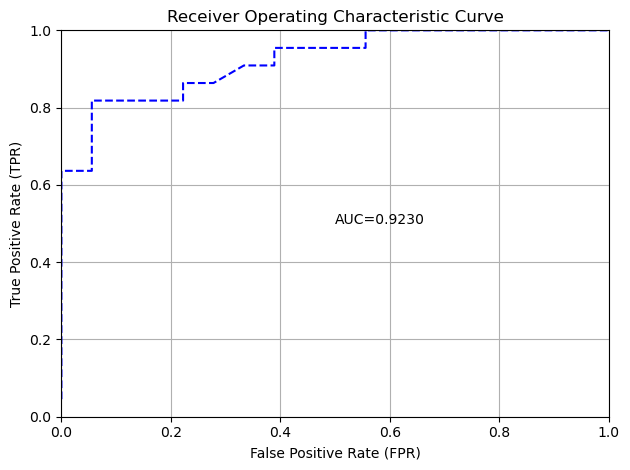

([0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.05555555555555555,
  0.05555555555555555,
  0.05555555555555555,
  0.05555555555555555,
  0.05555555555555555,
  0.1111111111111111,
  0.16666666666666666,
  0.2222222222222222,
  0.2222222222222222,
  0.2777777777777778,
  0.3333333333333333,
  0.3888888888888889,
  0.3888888888888889,
  0.4444444444444444,
  0.5,
  0.5555555555555556,
  0.5555555555555556,
  0.6111111111111112,
  0.6666666666666666,
  0.7222222222222222,
  0.7777777777777778,
  0.8333333333333334,
  0.8888888888888888,
  0.9444444444444444,
  1.0],
 [0.045454545454545456,
  0.09090909090909091,
  0.13636363636363635,
  0.18181818181818182,
  0.22727272727272727,
  0.2727272727272727,
  0.3181818181818182,
  0.36363636363636365,
  0.4090909090909091,
  0.45454545454545453,
  0.5,
  0.5454545454545454,
  0.5909090909090909,
  0.6363636363636364,
  0.6363636363636364,
  0.6818181818181818,
  0.7272727272727273,
  0.7727

In [99]:
best_gbm_perf12.plot()


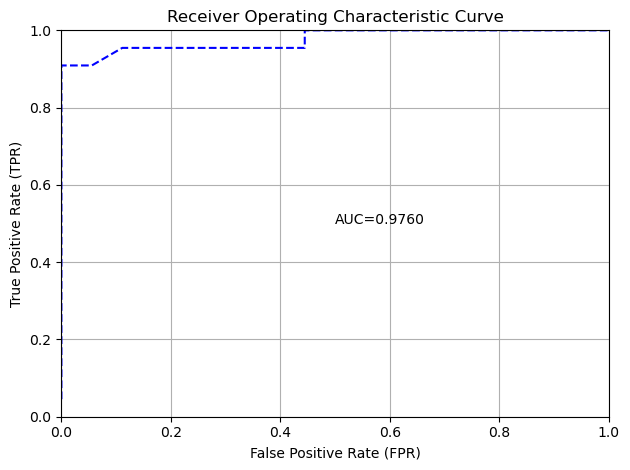

([0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.05555555555555555,
  0.1111111111111111,
  0.16666666666666666,
  0.2222222222222222,
  0.2777777777777778,
  0.3333333333333333,
  0.3888888888888889,
  0.4444444444444444,
  0.4444444444444444,
  0.5,
  0.5555555555555556,
  0.6111111111111112,
  0.6666666666666666,
  0.7222222222222222,
  0.7777777777777778,
  0.8333333333333334,
  0.8888888888888888,
  0.9444444444444444,
  1.0],
 [0.045454545454545456,
  0.09090909090909091,
  0.13636363636363635,
  0.18181818181818182,
  0.22727272727272727,
  0.2727272727272727,
  0.3181818181818182,
  0.36363636363636365,
  0.4090909090909091,
  0.45454545454545453,
  0.5,
  0.5454545454545454,
  0.5909090909090909,
  0.6363636363636364,
  0.6818181818181818,
  0.7272727272727273,
  0.7727272727272727,
  0.8181818181818182,
  0.8636363636363636,
  0.9090909090909091,
  0.9090909090909091,
  0.9545454545

In [100]:
best_gbm_perf1.plot()

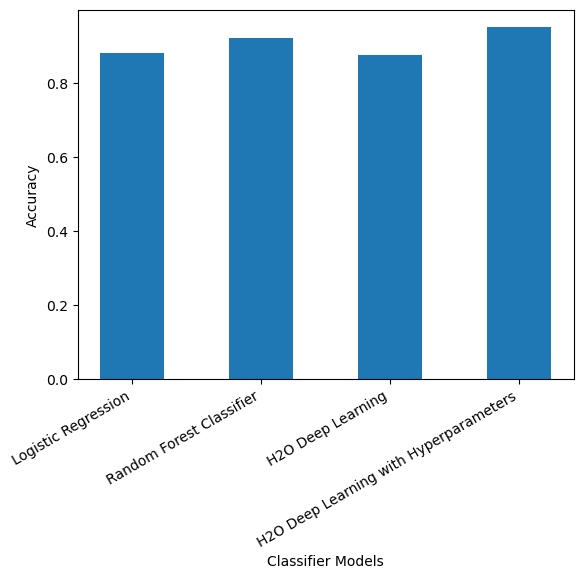

In [65]:
import matplotlib.pyplot as plt

left= [1,2,3,4]
height=  [0.88,0.92,0.875,0.95]

tick_label = ['Logistic Regression','Random Forest Classifier','H2O Deep Learning','H2O Deep Learning with Hyperparameters']

plt.bar(left,height,tick_label = tick_label,width =0.5)

plt.xlabel('Classifier Models')

plt.ylabel('Accuracy')

plt.xticks(rotation = 30, ha='right')

plt.show()

Text(0, 0.5, 'Average on the scale(0 to 1)')

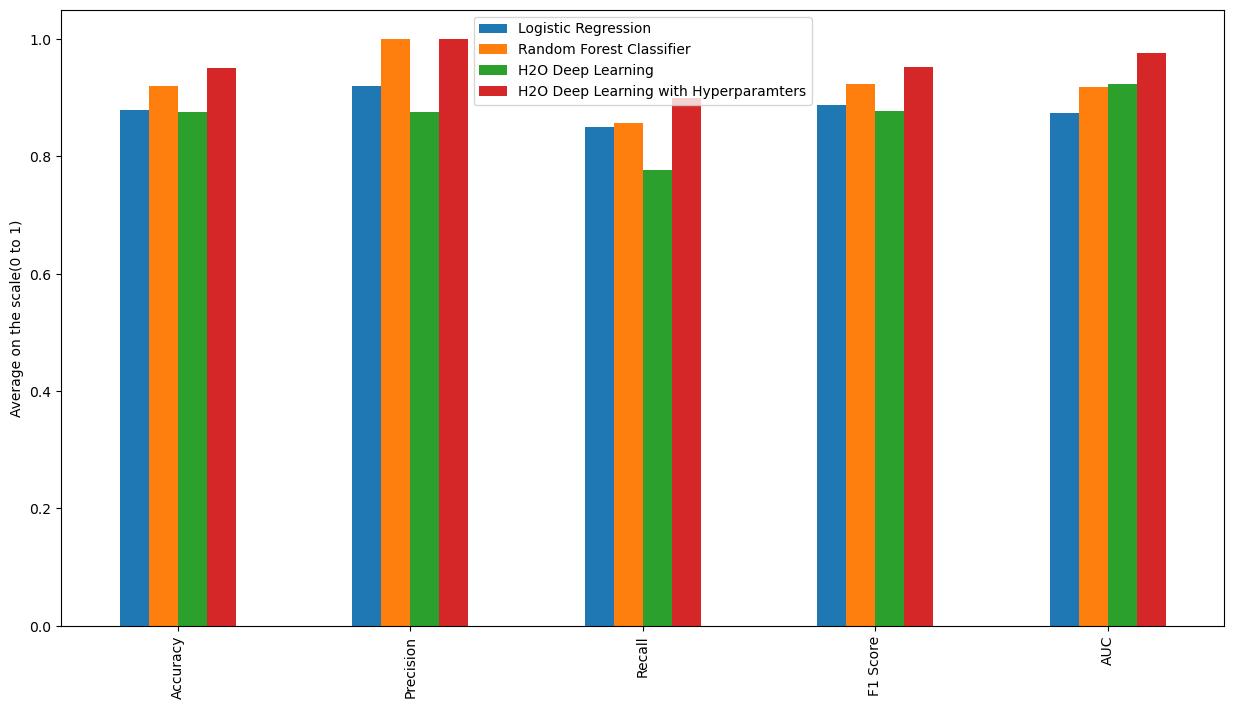

In [6]:
import matplotlib.pyplot as plt

plotdata = pd.DataFrame({

      "Logistic Regression": [0.88,0.92,0.851,0.888,0.8733],
       
       "Random Forest Classifier": [0.92,1.0,0.857,0.923,0.9188],
        
        "H2O Deep Learning": [0.875,0.875,0.777,0.8780,0.9230],
    
        "H2O Deep Learning with Hyperparamters": [0.95,1.0,0.9,0.952,0.9760]


},

    index=["Accuracy","Precision","Recall","F1 Score","AUC"])

plotdata.plot(kind="bar",figsize=(15, 8))


plt.ylabel("Average on the scale(0 to 1)")